# 피마 인디언 당뇨병 예측

In [4]:
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]

Saving pima-indians-diabetes.csv to pima-indians-diabetes (1).csv


In [6]:
import numpy as np
import pandas as pd
df = pd.read_csv(filename, header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
import tensorflow as tf
seed = 2022
tf.random.set_seed(seed)
np.random.seed(seed)

### 스케일 변환이 신경망 학습에 영향을 주는가?


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

- 원본 데이터

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    df.values[:, :-1], df.values[:, -1], stratify=df.values[:, -1], random_state=2022
)

In [39]:
del model

In [40]:
model = Sequential([
    Dense(12, input_dim=8, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 12)                108       
                                                                 
 dense_16 (Dense)            (None, 8)                 104       
                                                                 
 dense_17 (Dense)            (None, 1)                 9         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_split=0.2, 
                    epochs=200, batch_size=50, verbose=0)       # verbose: output 옵션을 조절해준다.


In [43]:
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 3ms/step - loss: 0.7138 - accuracy: 0.6927


[0.7137724757194519, 0.6927083134651184]

- 표준화 데이터

In [15]:
scaled = StandardScaler().fit_transform(df.values[:, :-1])
X_train2, X_test2, y_train, y_test = train_test_split(
    scaled, df.values[:, -1], stratify=df.values[:,-1], random_state=2022
)

In [25]:
model2 = Sequential([
    Dense(12, input_dim=8, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 12)                108       
                                                                 
 dense_10 (Dense)            (None, 8)                 104       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [26]:
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history2 = model2.fit(X_train2, y_train, validation_split=0.2, 
                    epochs=200, batch_size=50, verbose=0)  

In [27]:
model2.evaluate(X_test2, y_test)

6/6 [==============================] - 0s 3ms/step - loss: 0.5473 - accuracy: 0.7292


[0.5472936034202576, 0.7291666865348816]

- 훈련과정 시각화

In [28]:
import matplotlib.pyplot as plt

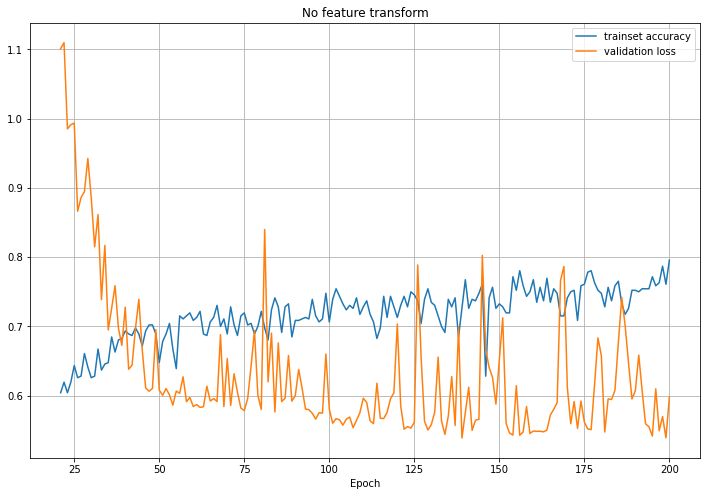

In [42]:
xs = np.arange(21, len(history.history['accuracy'])+1)       # epoch
plt.figure(figsize=(12,8))
plt.plot(xs, history.history['accuracy'][20:], ms=10, label='trainset accuracy')
plt.plot(xs, history.history['val_loss'][20:], ms=10, label='validation loss')
plt.xlabel('Epoch')
plt.grid()
plt.legend()
plt.title('No feature transform')
plt.show()

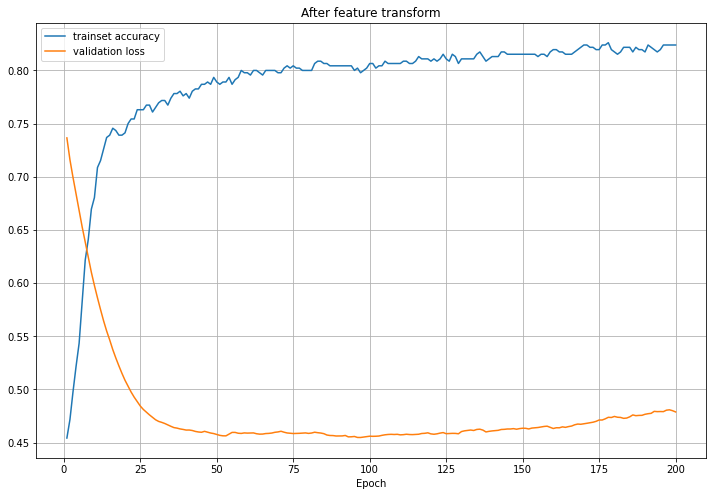

In [32]:
xs = np.arange(1, len(history.history['accuracy'])+1)      
plt.figure(figsize=(12,8))
plt.plot(xs, history2.history['accuracy'], ms=10, label='trainset accuracy')
plt.plot(xs, history2.history['val_loss'], ms=10, label='validation loss')
plt.xlabel('Epoch')
plt.grid()
plt.legend()
plt.title('After feature transform')
plt.show()